In [3]:
import pandas as pd
import numpy as np
companies = pd.read_csv(r'E:\upgrad\investment assignment 1\companies.txt',encoding='ISO-8859-1',sep='\t')

In [2]:
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [4]:
rounds2 = pd.read_csv(r'E:\upgrad\investment assignment 1\rounds2.csv',encoding='ISO-8859-1')



In [5]:
rounds2.company_permalink  = rounds2.company_permalink .str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [6]:
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [7]:
#merging the companies table attributes with rounds 2 : after converting the keys to lower case 
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
master_frame= pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how="left")

In [8]:
#finding the total sum of the null values 
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     74
name                          75
homepage_url                6200
category_list               3461
status                        74
country_code                8711
state_code                 10977
region                     10200
city                       10197
founded_at                 20562
dtype: int64

In [9]:
#percentage of the null values in each coloumn
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.06
name                        0.07
homepage_url                5.39
category_list               3.01
status                      0.06
country_code                7.58
state_code                  9.55
region                      8.87
city                        8.87
founded_at                 17.89
dtype: float64


In [10]:
#dropping the columns which are not used in further analysis
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [11]:
#percentage of null values in each column after dropping the columns
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.07
category_list          3.01
country_code           7.58
dtype: float64


In [12]:
#dropping all the null value entries
master_frame = master_frame.dropna(how='any',axis=0)

In [13]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64


In [14]:
#total data left 
print(100*(len(master_frame.index)/114949))

76.99588513166708


In [15]:
#dimension of the new dataframe
master_frame.shape

(88506, 6)

In [16]:
#total number of counts for each funding type
master_frame.funding_round_type.value_counts()

venture                  47804
seed                     21086
debt_financing            6506
angel                     4400
grant                     1935
private_equity            1820
undisclosed               1344
convertible_note          1317
equity_crowdfunding       1127
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [17]:
#reatining the rows with funding type as venture,seed ,angel and private euity only
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')| (master_frame['funding_round_type'] == 'private_equity')]

In [18]:
#Average funding amount for each funding type left
print(round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2))

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747949.08
venture           11724937.64
Name: raised_amount_usd, dtype: float64


In [21]:
Total_sum=master_frame.raised_amount_usd.sum()

In [22]:
print(Total_sum)

715113143482.0


In [24]:
master_frame.groupby(['funding_round_type']).size()

funding_round_type
angel              4400
private_equity     1820
seed              21086
venture           47804
dtype: int64

In [32]:
x=master_frame.funding_round_type.value_counts().sum()

In [33]:
x= str(x)

In [34]:
print(x)

75110


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
master_frame_chart_count = master_frame.groupby('funding_round_type', axis=0).sum()

In [50]:
master_frame_chart_count.head()

,raised_amount_usd
funding_round_type,
angel,4.274925e+09
private_equity,1.345680e+11
seed,1.577125e+10
venture,5.604989e+11


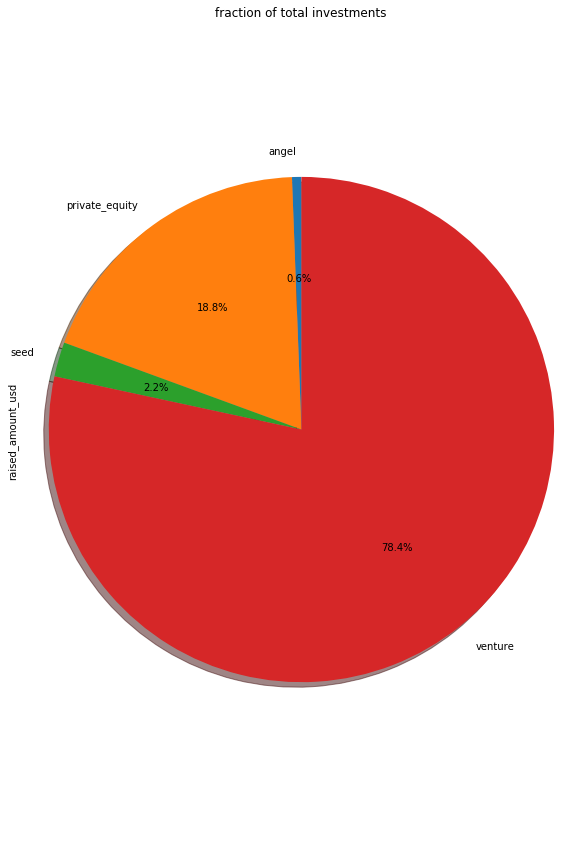

In [53]:
master_frame_chart_count['raised_amount_usd'].plot(kind='pie',
                            figsize=(10, 15),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
 
plt.title('Fraction of total investments')
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()
 

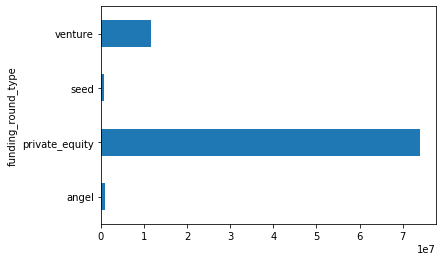

In [57]:
master_frame.groupby("funding_round_type").raised_amount_usd.mean().plot.barh()

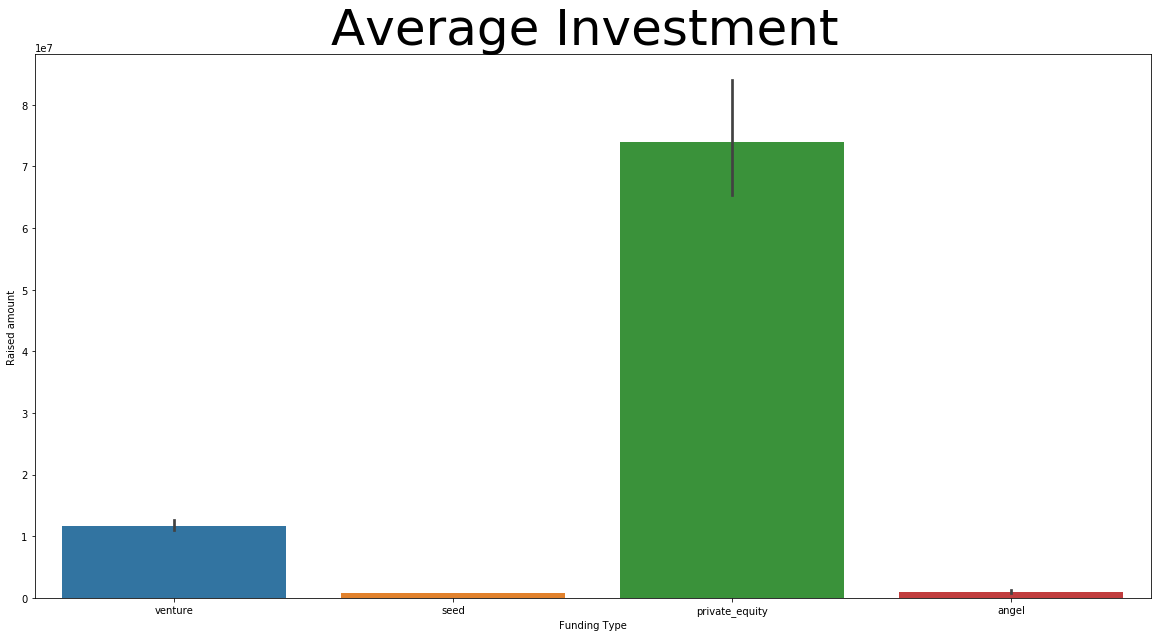

In [72]:
# bar plot with average investment for each funding type
plt.figure(figsize=(20,10))
avgplot=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
avgplot.set(xlabel='Funding Type', ylabel='Raised amount')
avgplot.set_title('Average Investment ',fontsize =50)
plt.show()

In [74]:
# selecting only the data where the funding type is venture and further analysis to be carried upon the new data frame.
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [75]:
#dropping the column funding round type as it is same for all data 
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

In [76]:
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA


In [106]:
#countries (based on the 'total' investment amount each country has received)
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')


In [107]:
#sorting and finding top 9 countries
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9.head(9)

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.208457e+09
ISR,6.854350e+09
DEU,6.305522e+09
JPN,3.167647e+09


In [110]:
top9['country_code'] = top9.index

In [111]:
top9 = top9[top9['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

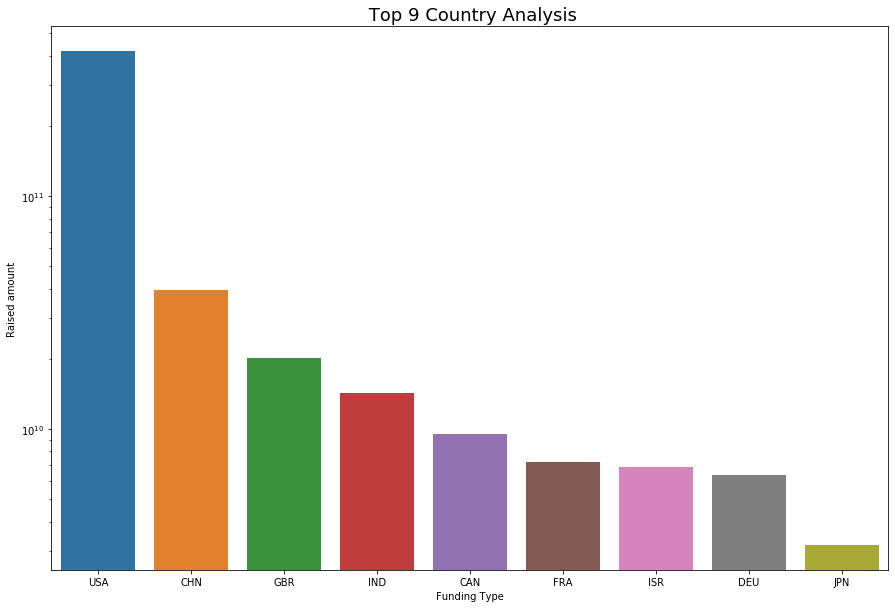

In [117]:
# bar plot with top 9 countries
plt.figure(figsize=(15,10))
t9plot=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
t9plot.set_yscale('log')
t9plot.set(xlabel='Funding Type', ylabel='Raised amount')
t9plot.set_title(' Top 9 Country Analysis',fontsize =18)
plt.show()

In [118]:
# selecting rows with top 3 english speaking countries
master_frame = master_frame[(master_frame['country_code'] == 'USA')| (master_frame['country_code'] == 'GBR')| (master_frame['country_code'] == 'IND')]

In [119]:
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA
12,/organization/0xdata,8900000.0,H2O.ai,Analytics,USA
22,/organization/1-mainstream,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


In [120]:
master_frame.shape

(38803, 5)

In [121]:
#SPLITTING THE CATEGORY LIST AND FINDING THE PRIMARY SECTOR
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [122]:
#checking the null sum of values 
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [123]:
#mapping  the column values to the row values using melt function
mapping = pd.melt(mapping, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Cleantech / Semiconductors','Entertainment',
                                                           'Health','Manufacturing','News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising'])

In [124]:
#displaying the first 5
mapping.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [125]:
#removing the values from the whole data wherever value is 0
mapping = mapping[~(mapping.value == 0)]

In [127]:
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [128]:
#dropping the column value since it is of no use now
mapping = mapping.drop('value', axis = 1)

In [129]:
#renaming the column variable to main_sector
mapping.rename(columns = {'variable':'main_sector'}, inplace = True) 

In [130]:
#merging the master frame with mapping 
master_frame = pd.merge(master_frame,mapping, how= 'left', on = 'category_list')

In [131]:
#computing the dataframe removing the null value entries
master_frame = master_frame[~(master_frame.main_sector.isnull())]

In [132]:
#number of rows retaines
len(master_frame.index)

36187

In [134]:
#Verifying
master_frame.tail()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
38798,/organization/zyomyx-inc,12000000.0,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors
38799,/organization/zyomyx-inc,14219999.0,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors
38800,/organization/zyomyx-inc,555016.0,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors
38801,/organization/zyrra,140500.0,Zyrra,E-Commerce,USA,Others
38802,/organization/zystor,8500000.0,Zystor,Biotechnology,USA,Cleantech / Semiconductors


In [135]:
#Converting dollar to million dollar
master_frame['raised_amount_usd']= master_frame['raised_amount_usd']/1000000


In [136]:
# separate data frame D1 ON THE BASID OF GIVEN CONDITION
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]

In [137]:
#finding the aggregate of raised_amount_fund on the basis of grouping of sectors in a new df
aggrD1 = D1.groupby('main_sector').agg({'raised_amount_usd': ['sum', 'count']})

In [138]:
#renaming of the aggregate valued columns
aggrD1.head()
aggrD1.columns = ['Total_amount', 'Total_count']

In [139]:
#merging the new df with D1
D1 = D1.merge(aggrD1, how='left', on ='main_sector')

In [140]:
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_amount,Total_count
0,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13796.816094,1563
1,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Others,26089.280296,2923
2,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
3,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
4,/organization/1366-technologies,5.150000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799


In [141]:
# separate data frame D2 ON THE BASID OF GIVEN CONDITION
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]

In [142]:
#finding the aggregate of raised_amount_fund on the basis of grouping of sectors in a new df
aggrD2 = D2.groupby('main_sector').agg({'raised_amount_usd': ['sum', 'count']})

In [143]:
#renaming of the aggregate valued columns
aggrD2.head()
aggrD2.columns = ['Total_amount', 'Total_count']

In [144]:
#merging the new df with D2
D2 = D2.merge(aggrD2, how='left', on ='main_sector')

In [145]:
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_amount,Total_count
0,/organization/365scores,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",821.888357,98
1,/organization/7digital,8.468328,7digital,Content Creators,GBR,Entertainment,461.511059,54
2,/organization/7digital,10.000000,7digital,Content Creators,GBR,Entertainment,461.511059,54
3,/organization/90min,15.000000,90min,Media,GBR,Entertainment,461.511059,54
4,/organization/90min,5.800000,90min,Media,GBR,Entertainment,461.511059,54


In [146]:
# separate data frame D3 ON THE BASID OF GIVEN CONDITION
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)] 

In [147]:
#finding the aggregate of raised_amount_fund on the basis of grouping of sectors in a new df
aggrD3 = D3.groupby('main_sector').agg({'raised_amount_usd': ['sum', 'count']})


In [148]:
#renaming of the aggregate valued columns
aggrD3.head()
aggrD3.columns = ['Total_amount', 'Total_count']

In [149]:
#merging the new df with D3
D3 = D3.merge(aggrD3, how='left', on ='main_sector')

In [150]:
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_amount,Total_count
0,/organization/-fame,10.000000,#fame,Media,IND,Entertainment,280.830000,33
1,/organization/21diamonds-india,6.369507,21Diamonds,E-Commerce,IND,Others,1007.409507,109
2,/organization/adlabs-imagica,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33
3,/organization/akosha,5.000000,Akosha,Consumer Internet,IND,"Social, Finance, Analytics, Advertising",290.543500,32
4,/organization/amagi-media-labs,5.500000,Amagi Media Labs,Advertising,IND,"Social, Finance, Analytics, Advertising",290.543500,32


In [151]:
master_plot=D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

In [153]:
master_plot.shape

(7132, 8)

In [154]:
master_plot=master_plot.append(D2[D2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])], ignore_index=True)

In [155]:
master_plot.shape

(7500, 8)

In [156]:
master_plot=master_plot.append(D3[D3['main_sector'].isin(['Others','News, Search and Messaging','Entertainment'])], ignore_index=True)

In [157]:
master_plot.shape

(7694, 8)

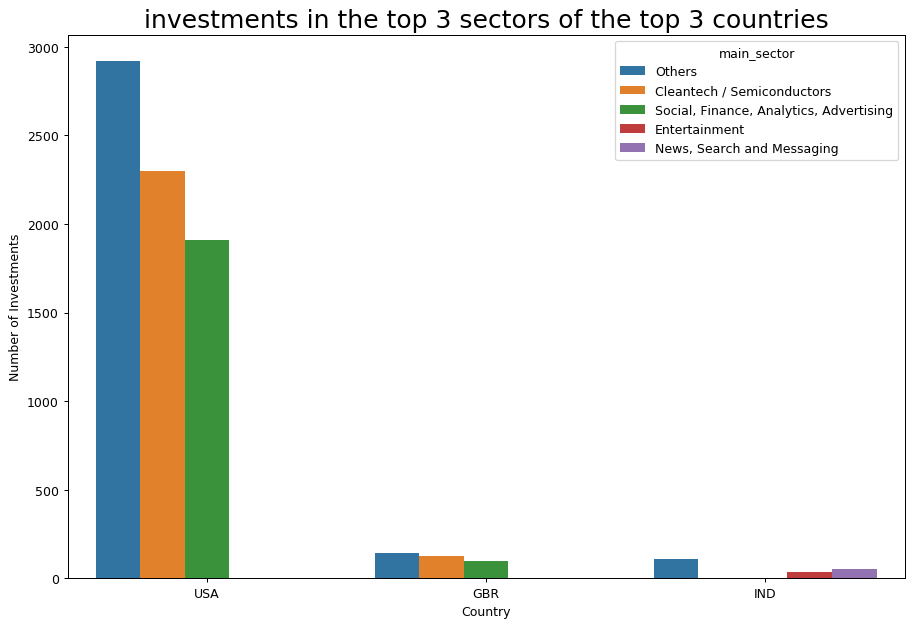

In [167]:
# creating bar plot for 3 different categories using hue
plt.figure(num=None, figsize=(12, 8), dpi=90, facecolor='w', edgecolor='k')
t3plot=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_plot,estimator=lambda x: len(x))
t3plot.set(xlabel='Country', ylabel='Number of Investments')
t3plot.set_title('investments in the top 3 sectors of the top 3 countries',fontsize =20)
plt.show()